## Loading Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/WELFake_Dataset.csv")

# Show shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (72134, 4)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.drop(columns= ["Unnamed: 0"],inplace = True)

In [5]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [8]:
df.shape

(72134, 3)

## Data Cleaning

In [9]:
# Drop rows with missing values in 'text' or 'label'
df.dropna(subset=['text'], inplace=True)



# Reset index after drops
df.reset_index(drop=True, inplace=True)

# Final check
print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (72095, 3)


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [10]:
df.shape


(72095, 3)

In [11]:
df.isnull().sum()

title    558
text       0
label      0
dtype: int64

## Checking Final Class Distribution

Label Distribution:

label
1    37067
0    35028
Name: count, dtype: int64


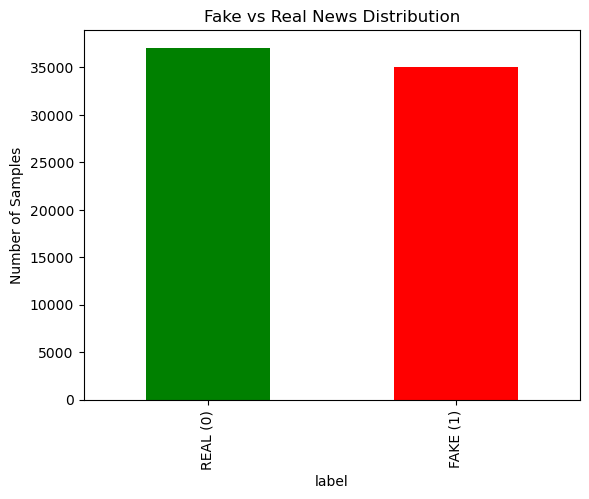

In [12]:
# Check class distribution
print("Label Distribution:\n")
print(df['label'].value_counts())

# Optional: Visualize it
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Fake vs Real News Distribution")
plt.xticks(ticks=[0, 1], labels=["REAL (0)", "FAKE (1)"])
plt.ylabel("Number of Samples")
plt.show()


## Basic Text Preprocessing

In [13]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    text = " ".join(text.split())
    return text

df["cleaned_text"] = df["text"].apply(clean_text)    
print(df["cleaned_text"].head())


0    no comment is expected from barack obama membe...
1        did they post their votes for hillary already
2    now most of the demonstrators gathered last ni...
3    a dozen politically active pastors came here f...
4    the rs28 sarmat missile dubbed satan 2 will re...
Name: cleaned_text, dtype: object


In [14]:
df.head()

,title,text,label,cleaned_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...
1,NaN,Did they post their votes for Hillary already?,1,did they post their votes for hillary already
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,now most of the demonstrators gathered last ni...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,the rs28 sarmat missile dubbed satan 2 will re...


##  TF-IDF Vectorization + Train-Test Split

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words = "english",max_df = 0.7)
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (57676, 368130)
Test shape: (14419, 368130)


##  Train PassiveAggressiveClassifier

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter = 1000)
model.fit(X_train,y_train)

accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9614


## Confusion Matrix & Classification Report

In [23]:
from sklearn.metrics import confusion_matrix ,classification_report 

y_pred = model.predict(X_test)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["REAL (0)", "FAKE (1)"]))

Confusion Matrix:

[[6701  309]
 [ 248 7161]]

Classification Report:

              precision    recall  f1-score   support

    REAL (0)       0.96      0.96      0.96      7010
    FAKE (1)       0.96      0.97      0.96      7409

    accuracy                           0.96     14419
   macro avg       0.96      0.96      0.96     14419
weighted avg       0.96      0.96      0.96     14419



## Saving Model & Vectorizer (with Joblib)

In [26]:
import joblib
import os

# Create a folder to save the files
os.makedirs("../model", exist_ok=True)

# Save model and vectorizer
joblib.dump(model, "../model/fake_news_model.joblib")
joblib.dump(vectorizer, "../model/tfidf_vectorizer.joblib")

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.
